# Exploratory Data Analysis , Regression, Data Wrangling and Visualization Challenges

We are going to explore some of this movie data. It comes from two
separate sources, boxofficemojo.com and metacritic.com. The data is
stored in files under directories related to these sources. The data
for each movie is stored in its own file.

#### Challenge 1

**First of all, before you do any of these challenges, start a *eda-and-reg* branch in your repository if you haven't done so already.** You will commit the additions you make while solving these challenges to that branch. In the end, you will submit your work by making a pull request.


Start a new ipython notebook in the `project_1` directory. We will read the
data from the boxofficemojo files. The files are in json format, which
is a way to serialize key-value pairs. It looks exactly like how
python shows the contents of a dictionary. For example,

    {"Ryan Gosling": 9,
    "George Clooney": 8,
    "Irmak Sirer": 11}

is a valid json format. (It can be more complex than that, for example
the values might be nested lists, or more dictionaries, etc.)
Import the `os` module to be able to modify/access filesystem
commands, and the `json` module so we can parse these.

    import os
    import json

the relative path to the data directory (since you are already in the
`project_1` directory) is defined as `data/boxofficemojo/` in a Mac (or
linux) system, and as `data\boxofficemojo\` in a Windows
system. However, you don't need to know on what kind of system this
will be run if you use the `os` module:

    DATA_DIR = os.path.join('data', 'boxofficemojo')

will put the correct path in `DATA_DIR`. `os.path.join` basically
combines elements of a path in the correct way for the system.

Let's say we know the filename to a specific file:
`mojo_bladerunner.json`. You can get the path to it with

    target_file_name = 'mojo_bladerunner.json'
    target_file_path = os.path.join(DATA_DIR, target_file_name)

Once a file is opened for reading, the `load` function from the `json`
module will convert this string into a python dictionary:

    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)

Now `movie` is a dictionary. You can look at its contents with `print
movie`, but a more readable pretty-print format is provided by the
`pprint` module:

    from pprint import pprint
    pprint(movie)

will show you the contents in a neatly organized way. You can learn
more about each field in the README file within the data folder.

You initial challenge is to make a single list of movies. Every
single movie in that boxofficemojo directory should be a dictionary in this list. There is a single json file for each movie. Read all this information into a python dictionary, and put the dictionary into the list. When you do this for every movie, you will end up with one big list.
Call this list `movies`. How many movies are there?

Final hint: The `listdir` function from `os`  gives you a list of all
filenames in a given directory.

In [1]:
import os
import json
import pprint
import numpy as np

In [2]:
# CURRENT_DIR = os.path.dirname(os.path.realpath(__file__))
CURRENT_DIR = os.getcwd()
DATA_DIR = os.path.abspath(os.path.join(CURRENT_DIR, 'data'))
MOJO_DIR = os.path.join(DATA_DIR, 'boxofficemojo')

In [3]:
MOJO_DIR

'/Users/jwesley/ipyntbks/cap1/challenges/challenge_1/data/boxofficemojo'

In [4]:
def get_boxofficemojo_movies():
    file_contents = os.listdir(MOJO_DIR)

    movie_list = []

    for filename in file_contents:
        filepath = os.path.join(MOJO_DIR, filename)

        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)

        movie_list.append(movie_data)

    print "Parsed %i movies from %i files" % (len(movie_list),
                                              len(file_contents))
    return movie_list

In [5]:
movies = get_boxofficemojo_movies()

Parsed 3728 movies from 3728 files


# 3728 movies.

#### Challenge 2

What years are the movies from? Are they mostly recent? How far back
do they go? In a new cell, make a list of years in the
dataset. Extract the year field and put the year value for each movie
into a single list. Let's call this list `movie_years`. Now we want to
count the years. What we want is something like a dictionary, with
each year as a key, and the corresponding value is the number of
movies from that year in the dataset.

Hint: Check out the `Counter` class from the `collections` module. You
don't have to use it but it makes things pretty easy.

In [6]:
movies[0]

{u'alt_title': u'10,000 B.C. (2008)',
 u'director': u'Roland Emmerich',
 u'domestic_gross': 94784201,
 u'mojo_slug': u'10000bc',
 u'opening_per_theater': 10518,
 u'opening_weekend_take': 35867488,
 u'production_budget': 105000000,
 u'release_date_limited': None,
 u'release_date_wide': u'2008-03-07',
 u'title': u'10,000 B.C.',
 u'widest_release': 3454,
 u'worldwide_gross': 269784201,
 u'year': 2008}

In [7]:
movies[0]['year']

2008

In [8]:
from collections import Counter
years_list = [movie['year'] for movie in movies]
years = Counter(years_list)

In [9]:
print min(years.keys())

None


In [10]:
min([year for year in years.keys() if year != None])

1933

In [11]:
max([year for year in years.keys() if year != None])

2015

# The years go from 1933 to 2015.

#### Challenge 3

Start a new cell. Pretty-printing the result of the previous challenge gives you a
decent idea, but let's make a real histogram. Let's make sure ipython
notebook shows the graphs inline and we import the necessary plotting
stuff:

    %matplotlib inline
    import matplotlib.pyplot as plt
	import seaborn as sns

The documentation for plotting a histogram with matplotlib is
[here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist),
but it is basically as easy as doing

    plt.hist(movie_years)

but if you try this now you should get an error. What happened? It
says `NoneType` in the error. If you look in carefully you might see
that some of the years were `None` in `movie_years`. That's because
year data was missing for a handful of movies on boxofficemojo, and
the value is `None`. (How many of them are there?) Clean those out
from your list of years and plot a histogram. Give it a title by
adding a line

    plt.title('Your title goes here")

Note: We imported seaborn but do not seem to use it. However, just the
act of importing seaborn changes the harsh default color scheme and
other visual settings of `matplotlib` and makes the plots made with it
look better.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
years.pop(None)
years

Counter({1933: 1,
         1936: 1,
         1937: 1,
         1940: 1,
         1946: 1,
         1950: 1,
         1951: 3,
         1953: 1,
         1956: 2,
         1959: 1,
         1960: 1,
         1964: 1,
         1967: 2,
         1968: 2,
         1969: 4,
         1970: 6,
         1971: 2,
         1972: 4,
         1974: 4,
         1975: 3,
         1976: 6,
         1977: 4,
         1978: 6,
         1979: 9,
         1980: 14,
         1981: 12,
         1982: 18,
         1983: 19,
         1984: 17,
         1985: 13,
         1986: 21,
         1987: 27,
         1988: 31,
         1989: 29,
         1990: 24,
         1991: 24,
         1992: 28,
         1993: 39,
         1994: 30,
         1995: 51,
         1996: 52,
         1997: 74,
         1998: 84,
         1999: 106,
         2000: 99,
         2001: 108,
         2002: 132,
         2003: 146,
         2004: 161,
         2005: 164,
         2006: 184,
         2007: 190,
         2008: 194,
        

In [14]:
years_vals = zip(years.keys(),years.values())
years_vals

[(1933, 1),
 (1936, 1),
 (1937, 1),
 (1940, 1),
 (1946, 1),
 (1950, 1),
 (1951, 3),
 (1953, 1),
 (1956, 2),
 (1959, 1),
 (1960, 1),
 (1964, 1),
 (1967, 2),
 (1968, 2),
 (1969, 4),
 (1970, 6),
 (1971, 2),
 (1972, 4),
 (1974, 4),
 (1975, 3),
 (1976, 6),
 (1977, 4),
 (1978, 6),
 (1979, 9),
 (1980, 14),
 (1981, 12),
 (1982, 18),
 (1983, 19),
 (1984, 17),
 (1985, 13),
 (1986, 21),
 (1987, 27),
 (1988, 31),
 (1989, 29),
 (1990, 24),
 (1991, 24),
 (1992, 28),
 (1993, 39),
 (1994, 30),
 (1995, 51),
 (1996, 52),
 (1997, 74),
 (1998, 84),
 (1999, 106),
 (2000, 99),
 (2001, 108),
 (2002, 132),
 (2003, 146),
 (2004, 161),
 (2005, 164),
 (2006, 184),
 (2007, 190),
 (2008, 194),
 (2009, 192),
 (2010, 209),
 (2011, 264),
 (2012, 257),
 (2013, 308),
 (2014, 280),
 (2015, 53)]

(array([  4.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          3.00000000e+00,   2.00000000e+01,   7.60000000e+01,
          1.81000000e+02,   3.82000000e+02,   1.10000000e+03,
          1.94700000e+03]),
 array([ 1933. ,  1941.2,  1949.4,  1957.6,  1965.8,  1974. ,  1982.2,
         1990.4,  1998.6,  2006.8,  2015. ]),
 <a list of 10 Patch objects>)

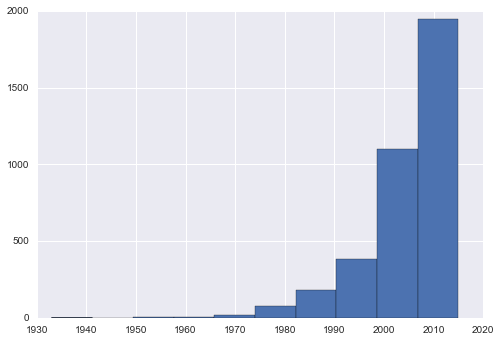

In [15]:
val, weight = zip(*[(k, v) for k,v in years.items()])
plt.hist(val, weights=weight)

(array([   1.,    1.,    1.,    0.,    1.,    0.,    0.,    1.,    0.,
           0.,    4.,    0.,    1.,    0.,    2.,    1.,    1.,    0.,
           1.,    0.,    2.,    6.,    6.,    6.,    0.,    7.,   10.,
           6.,   23.,   30.,   19.,   30.,   48.,   31.,   53.,   52.,
          39.,   81.,   52.,  158.,  205.,  108.,  278.,  325.,  184.,
         384.,  401.,  264.,  565.,  333.]),
 array([ 1933.  ,  1934.64,  1936.28,  1937.92,  1939.56,  1941.2 ,
         1942.84,  1944.48,  1946.12,  1947.76,  1949.4 ,  1951.04,
         1952.68,  1954.32,  1955.96,  1957.6 ,  1959.24,  1960.88,
         1962.52,  1964.16,  1965.8 ,  1967.44,  1969.08,  1970.72,
         1972.36,  1974.  ,  1975.64,  1977.28,  1978.92,  1980.56,
         1982.2 ,  1983.84,  1985.48,  1987.12,  1988.76,  1990.4 ,
         1992.04,  1993.68,  1995.32,  1996.96,  1998.6 ,  2000.24,
         2001.88,  2003.52,  2005.16,  2006.8 ,  2008.44,  2010.08,
         2011.72,  2013.36,  2015.  ]),
 <a list of 50 P

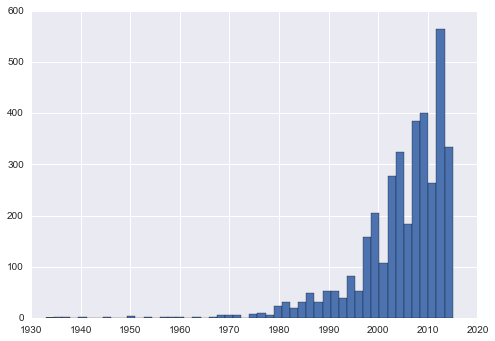

In [16]:
xvals, heights = zip(*[(k, v) for k,v in years.items()])
plt.hist(xvals, weights=heights, bins=50)

#### Challenge 4

Let's look at something else. Make a histogram of the domestic gross
numbers. With a regular histogram, however, you can't really see much,
since low gross movies dominate the dataset. Use a log scale
(logarithm of gross is much easier to read).

In [17]:
movies[0]

{u'alt_title': u'10,000 B.C. (2008)',
 u'director': u'Roland Emmerich',
 u'domestic_gross': 94784201,
 u'mojo_slug': u'10000bc',
 u'opening_per_theater': 10518,
 u'opening_weekend_take': 35867488,
 u'production_budget': 105000000,
 u'release_date_limited': None,
 u'release_date_wide': u'2008-03-07',
 u'title': u'10,000 B.C.',
 u'widest_release': 3454,
 u'worldwide_gross': 269784201,
 u'year': 2008}

In [18]:
import math
log_dom_gross = [math.log10(movie['domestic_gross']) for movie in movies if movie['domestic_gross'] != None]
log_dom_gross

[7.976735953473806,
 7.82579615555162,
 7.581815061951558,
 5.308293295050092,
 3.9644010711627313,
 5.8496300600265805,
 7.263286362188867,
 7.087593111752921,
 5.90459546220917,
 7.7576370029567885,
 4.140162229613637,
 7.514533129838436,
 5.0841829114204735,
 7.85724579777389,
 7.566969174401933,
 7.807312202199124,
 7.755531795193703,
 8.220401443814666,
 7.524384255120891,
 6.1597440029128725,
 6.694293184477959,
 7.909338640405728,
 7.409635267565521,
 7.21193377437316,
 8.141285641789336,
 7.116760284714743,
 7.885410154572015,
 7.570198262852948,
 7.653838556250921,
 7.456956575642527,
 5.801547764861395,
 6.646795101099476,
 8.104333104081022,
 7.878593367767894,
 4.777818163581255,
 8.323489172619478,
 7.197279427579782,
 4.1671104785966575,
 7.597355030877814,
 7.568834206412733,
 7.729220823030041,
 5.249225270581422,
 5.001487081184149,
 4.634205121079346,
 5.1707368318047955,
 6.815104282002392,
 6.992649202290461,
 4.3122408451442125,
 7.5792211869824335,
 8.039212738331

(array([    3.,    15.,    90.,   215.,   353.,   410.,   449.,   783.,
         1188.,   147.]),
 array([ 1.8573325 ,  2.5597096 ,  3.26208671,  3.96446382,  4.66684093,
         5.36921803,  6.07159514,  6.77397225,  7.47634936,  8.17872647,
         8.88110357]),
 <a list of 10 Patch objects>)

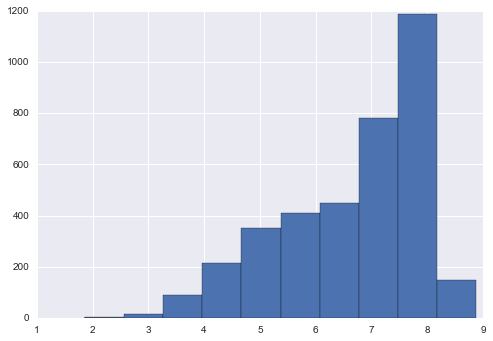

In [19]:
plt.hist(log_dom_gross)


#### Challenge 5

Make a histogram of title lengths (number of characters in the movie's
title). Add labels to the x and y axes to make it clearer.

(array([  6.66000000e+02,   1.87400000e+03,   8.71000000e+02,
          2.12000000e+02,   8.00000000e+01,   1.80000000e+01,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  0. ,   8.2,  16.4,  24.6,  32.8,  41. ,  49.2,  57.4,  65.6,
         73.8,  82. ]),
 <a list of 10 Patch objects>)

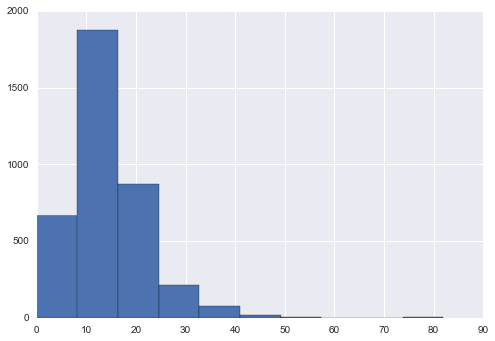

In [20]:
len_titles = [len(movie['title']) for movie in movies]
plt.hist(len_titles)

#### Challenge 6

Ok, now let's do this with pandas.

    import pandas as pd

Assuming you called your original list of dictionaries with all the films
`movies`, you can do this:

    movies_df = pd.DataFrame(movies)
    movies_df['year'].hist()

This gives us a histogram of movies.

You can see that we don't have a lot before the 80's. Let's focus on
the last 25 years. You can filter with a boolean expression like this:

    recent_movies = movies_df[movies_df['year']>=1990]

Now `recent_movies` is a dataframe only with movies released
after 1990. Make a histogram of these only, make sure they are all
indeed after 1990.

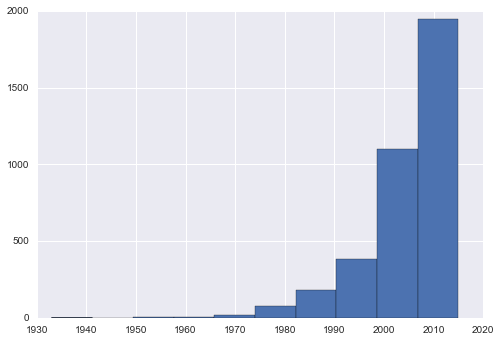

In [21]:
import pandas as pd
movies_df = pd.DataFrame(movies)
movies_df['year'].hist()

In [22]:
recent = movies_df[movies_df['year']>=1990]

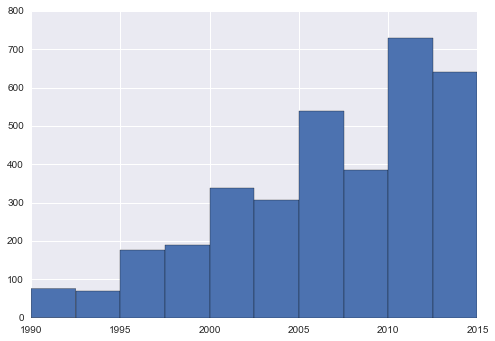

In [23]:
recent['year'].hist()

#### Challenge 7

Like a histogram, pandas makes it easy to do other types of plots as
well. Make a boxplot of domestic grosses, grouped by year. So, for
each year you should have a boxplot showing the distribution. Do this
for only movies released at or after 1990.

Hint: You can do this with a single, simple line of code.

Once you have it, try to play with its size, limits of y-axis, etc. to
make it big and readable. You wouldn't want things to overlap each
other, or be tiny and squeezed together in a way that would hinder you
from understanding what's going on with grosses over the years.

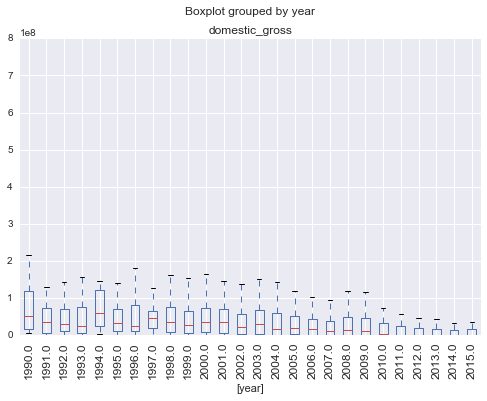

In [24]:
recent.boxplot(column=['domestic_gross'], by=['year'], rot=90, grid=True)

/Users/jwesley/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x119d7ce90>],
 'caps': [<matplotlib.lines.Line2D at 0x119d24d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x119d87050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119d319d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119d7cfd0>,
  <matplotlib.lines.Line2D at 0x119d246d0>]}

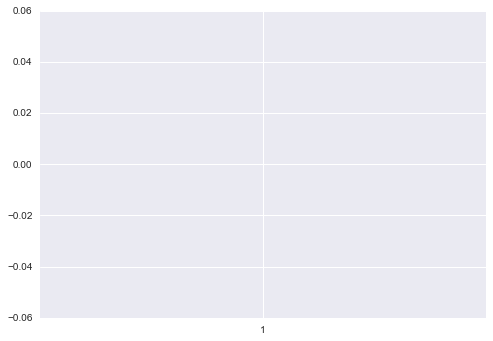

In [25]:
plt.boxplot(recent['domestic_gross'])

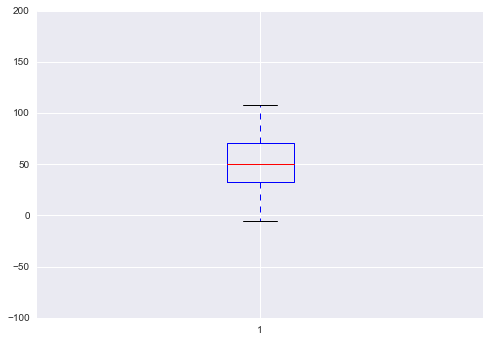

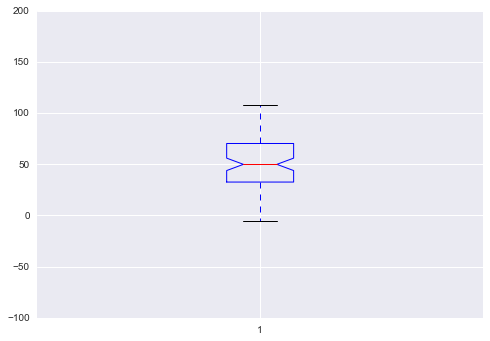

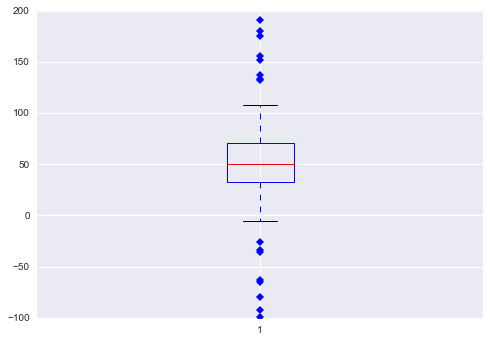

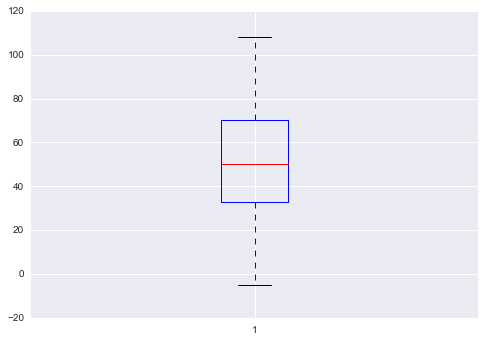

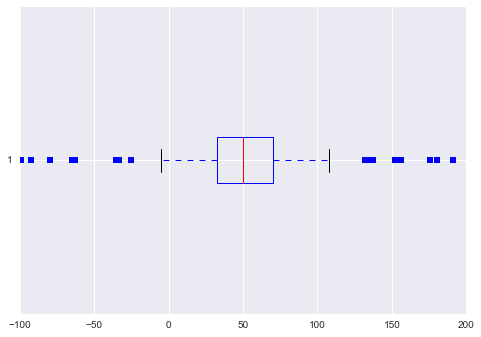

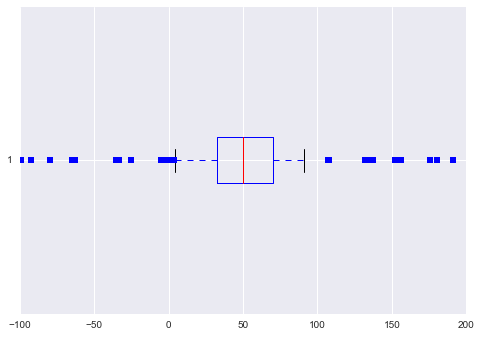

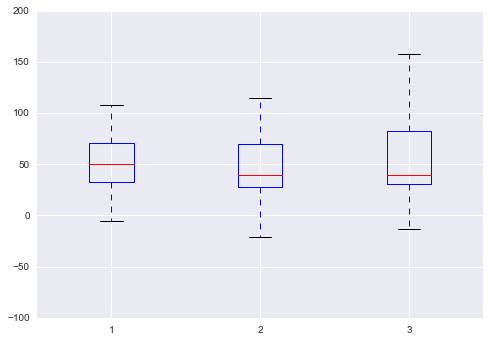

In [27]:

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(data)

# notched plot
plt.figure()
plt.boxplot(data, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(data, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(data, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(data, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(data, 0, 'rs', 0, 0.75)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

plt.show()

#### Challenge 8

Let's take a look at the dataframe. if you do

    movies_df.head()

it will show the first five rows, and ipython notebook will show it in
a nice format. One thing you could notice is that the production
budget values are missing from 2 movies even among these 5. That NaN
(not-a-number) is how pandas treats missing values. They are like
NULLs in a SQL database. Pandas is smart enough to not count them as
real values, keeps them out of the calculation if you need the mean,
etc. If you do

    movies_df.describe()

you get a nice report on every column in the data, allowing you to
inspect and get a feel for each of them. You can see the
count is much lower on production budget, this means a lot of NaNs.

Make a new dataframe that only has movies for which we have budget
information. How many are left?

Hint: You want to look for the `dropna` method.

In [28]:
movies_df.head(8)

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",3454.0,269784201.0,2008.0
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,2704.0,183611771.0,2000.0
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,2311.0,53478166.0,1999.0
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,63.0,203373.0,2012.0
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,2.0,NaN,2013.0
5,The 11th Hour (2007),None,707343.0,11thhour,15213.0,60853.0,NaN,None,2007-08-17,The 11th Hour,111.0,985207.0,2007.0
6,127 Hours (2010),Danny Boyle,18335230.0,127hours,2333.0,2136801.0,18000000.0,2010-11-05,2011-01-28,127 Hours,916.0,60738797.0,2010.0
7,12 Rounds (2009),Renny Harlin,12234694.0,12rounds,2286.0,5329240.0,NaN,None,2009-03-27,12 Rounds,2331.0,17280326.0,2009.0


In [29]:
movies_df['domestic_gross'].diff()

0               NaN
1       -27827175.0
2       -28778860.0
3       -37974793.0
4         -194160.0
5          698130.0
6        17627887.0
7        -6100536.0
8       -11431916.0
9        56428969.0
10      -57217938.0
11       32685090.0
12      -32577509.0
13       71864238.0
14      -35090487.0
15       27271928.0
16       -7212077.0
17      109157175.0
18     -132663081.0
19      -32004498.0
20        3501857.0
21       76212920.0
22      -55476985.0
23       -9391904.0
24      122157191.0
25     -125363072.0
26       63724059.0
27      -39638166.0
28        7894427.0
29      -16425999.0
           ...     
3698   -100128964.0
3699     25585006.0
3700    -16518691.0
3701     90835475.0
3702    -59655027.0
3703    -37934443.0
3704     73198743.0
3705    -59316539.0
3706    -16250504.0
3707     45600489.0
3708    -34660284.0
3709      7492734.0
3710      3102439.0
3711    -19960255.0
3712     51776672.0
3713    -38131576.0
3714    -15252013.0
3715    115792222.0
3716   -115536344.0


In [30]:
movies_df_yr = movies_df[np.isfinite(movies_df['domestic_gross'])].groupby(['year'])

In [31]:
movies_df_yr.mean()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross
year,,,,,,
1940.0,8.425417e+07,NaN,NaN,NaN,NaN,NaN
1953.0,8.740465e+07,NaN,NaN,4.000000e+06,NaN,NaN
1956.0,6.550000e+07,NaN,NaN,NaN,NaN,NaN
1959.0,5.160000e+07,NaN,NaN,NaN,NaN,NaN
1960.0,3.200000e+07,NaN,NaN,8.069470e+05,NaN,NaN
1964.0,1.087811e+07,NaN,NaN,NaN,NaN,1.087811e+07
1967.0,1.049453e+08,NaN,NaN,NaN,NaN,NaN
1968.0,4.477231e+07,NaN,NaN,1.200000e+07,NaN,3.258962e+07
1969.0,1.023089e+08,NaN,NaN,NaN,NaN,NaN


In [32]:
movies_dom_ave = movies_df_yr.mean()['domestic_gross']

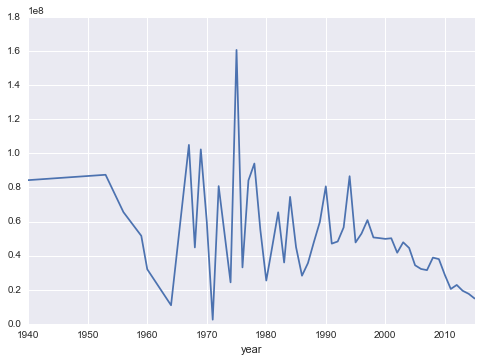

In [33]:
movies_dom_ave.plot()

#### Challenge 9

Make a scatterplot of the opening weekend take versus domestic gross
for all the movies. Also report on how many movies have both of these
values (how many are you losing since one of these is missing).

In [34]:
movies_df.quantile?

In [35]:
movies_df[np.isfinite(movies_df['domestic_gross'])]['domestic_gross'].quantile(q=0.75)

49662533.0

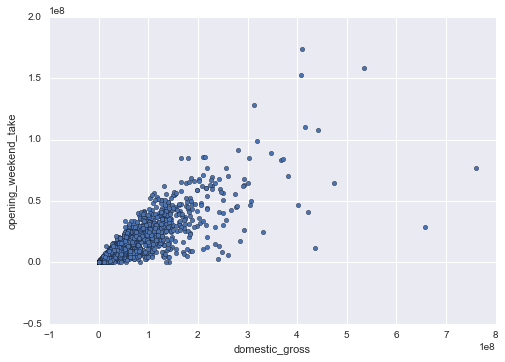

In [36]:
movies_df.plot.scatter('domestic_gross','opening_weekend_take')

In [37]:
movies_df[np.isfinite(movies_df['domestic_gross'])].count()

alt_title               3653
director                2143
domestic_gross          3653
mojo_slug               3653
opening_per_theater     3548
opening_weekend_take    3548
production_budget       1588
release_date_limited     293
release_date_wide       3650
title                   3653
widest_release          3576
worldwide_gross         2813
year                    3653
dtype: int64

In [38]:
movies_df[np.isfinite(movies_df['opening_weekend_take'])].count()

alt_title               3548
director                2116
domestic_gross          3548
mojo_slug               3548
opening_per_theater     3548
opening_weekend_take    3548
production_budget       1574
release_date_limited     292
release_date_wide       3546
title                   3548
widest_release          3530
worldwide_gross         2781
year                    3548
dtype: int64

## Switching to Regression Before Challenge 10

Ok. Let's do a linear regression. There are two main packages for that
in python. `statsmodels` imitates R in terms of its interface, and
gives a lot of information/diagnostics in a neat table. It is mostly
good for linear and logistic regression, and generalized linear models
in general. `scikit.learn` is python's big machine learning
library. It has a lot of machine learning algorithms (including linear
regression), uses the same interface for all of them (makes it very
easy), and is very actively developed, with more features added very
frequently. It's main disadvantage is that it does not provide a
summary table like `statsmodels`.

Let's start with statsmodels. Make a dataframe called df that has both
the opening weekend take and the domestic gross columns, and drop all
rows with missing data. Call this new dataframe `df`. Now let's fit a model.

    import statsmodels.api as sm

    Y = df.domestic_gross
    X = sm.add_constant(df.opening_weekend_take)

    linmodel = sm.OLS(Y,X).fit()

We are taking the domestic_gross column as our Y variable. X will be a matrix
including all feature columns. But why did we not do  `X =
df.opening_weekend_take`? Well, `statsmodels` does not like to treat
the intercept as a special part of the model. As a design choice, it
wants to treat is just like any other feature that you multiply with a
parameter, however the value for this feature is always one. So, to
have an intercept, you would have to andd a column that has the value
1 for every row. To make it easy to do so, they added this
`add_constant` function, which does exactly that. So now our X is a
matrix with two columns: opening weekend take, and a constant column
that's all 1s.

The fitting is done in one line. Note that Y comes before X. This is
the `statsmodels` design choice (`scikit.learn` does it the other
way).
We now have a linear model trained on
the X and Y data.

Switch to a new cell and execute
 
    linmodel.summary()

This is the table that statsmodels presents with a lot of information
about the model. You are likely to recognize some or most of
these reported metrics. Later in class, we will go over each of them
to make sure there are no gaps left.

And finally, switch to a new cell:

    predicted_gross = linmodel.predict(X)
    plt.scatter(df.opening_weekend_take, df.domestic_gross, color='gray')
    plt.plot(df.opening_weekend_take, predicted_gross)
    plt.title("Opening Weekend Based Model for Domestic Gross")
    plt.xlabel("Opening Weekend Take ($100M)")
    plt.ylabel("Domestic Gross ($100M)")

Here we are first getting the predictions for each movie that we used
in fitting. We are basically asking, what is the expected value that
the model thinks is for this opening_weekend_take?
We then make a scatterplot of all movies in a gray color to pepper the
background showing where observed values fall.
Next, we plot the predictions (which form a line since this is a
single feature model).
Finally we add a title and labels.

You are now ready to continue with the challenges.

In [39]:
df = movies_df[['opening_weekend_take','domestic_gross']]

In [40]:
df = df.dropna(axis=0)
df.count()

opening_weekend_take    3548
domestic_gross          3548
dtype: int64

In [41]:
import statsmodels.api as sm

In [42]:
Y = df.domestic_gross
X = sm.add_constant(df.opening_weekend_take)

In [43]:
linmodel = sm.OLS(Y,X).fit()

In [44]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     9522.
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        18:03:40   Log-Likelihood:                -66088.
No. Observations:                3548   AIC:                         1.322e+05
Df Residuals:                    3546   BIC:                         1.322e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 5.397e+06   5.92e+05      9.120      0.000      4.24e+06  6.56e+06
opening_weekend_take     3.4734      0.036     97.581      0.000         3.404     3.543
==============================================================================
Omnibus:                     4177.673   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873313.507
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      78.946   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
predicted_gross = linmodel.predict(X)

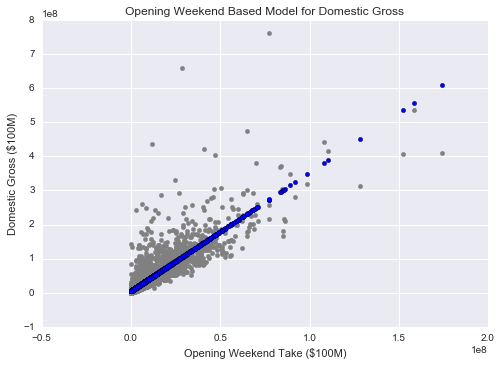

In [46]:
plt.scatter(df.opening_weekend_take, df.domestic_gross, color = 'grey')
plt.scatter(df.opening_weekend_take, predicted_gross)
plt.title("Opening Weekend Based Model for Domestic Gross")
plt.xlabel("Opening Weekend Take ($100M)")
plt.ylabel("Domestic Gross ($100M)")

#### Challenge 10

Make a scatterplot of actual domestic gross versus predicted domestic
gross. Also plot a line that shows what ideal predictions would
be. Anything above that line is over-prediction, anything below is
underprediction.

#### Challenge 11

Make a scatterplot of predicted gross versus residuals. Also plot a
line that takes the residual value 0 for every gross. We are assuming
that the random part of our model is a normal distribution with the
mean zero. So, ideally, the residuals should be forming a band around
this zero line, and the range shouldn't change. This plot helps you
check that assumption.

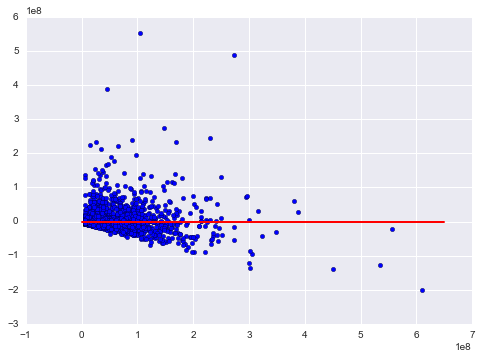

In [47]:
plt.scatter(predicted_gross, linmodel.resid)
plt.plot([0,650000000],[0,0], 'r-' ,lw=2)

#### Challenge 12

We're talking about money (opening weekend and total gross), and
usually, in many real life problems, orders of magnitude of features that spread over such
large scales may be better suited to such models than the values
themselves.

Instead of predicting gross with opening weekend, build a model that
predicts log(gross) with log(opening weekend).

- Print the summary
- Plot log(opening) vs log(gross) (and the fitted line)
- Plot the residuals over log(gross)

(Does it look better or worse? What are the problems?)

In [48]:
df_log = pd.DataFrame(np.matrix([np.log10(movies_df['opening_weekend_take']),movies_df['opening_weekend_take'],np.log10(movies_df['domestic_gross']), movies_df['domestic_gross']]).T)
df_log.columns = ['log_opening_week_take','opening_week_take','log_domestic_gross','domestic gross']
df_log.head()

,log_opening_week_take,opening_week_take,log_domestic_gross,domestic gross
0,7.554701,35867488.0,7.976736,94784201.0
1,7.298490,19883351.0,7.825796,66957026.0
2,6.920681,8330681.0,7.581815,38178166.0
3,4.356160,22707.0,5.308293,203373.0
4,3.546049,3516.0,3.964401,9213.0


In [49]:
movies_df.head()

,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",3454.0,269784201.0,2008.0
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,2704.0,183611771.0,2000.0
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,2311.0,53478166.0,1999.0
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,63.0,203373.0,2012.0
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,2.0,NaN,2013.0


#### Challenge 13

Make a predictive model for log(domestic gross) with two features:
log(opening weekend) and square of log(opening weekend). We are
building a quadratic model. Make the residual plot again.

In [50]:
X_df = pd.DataFrame(np.matrix([df_log.log_domestic_gross, df_log.log_opening_week_take, (df_log.log_opening_week_take)**2]).T)
X_df.columns = ['log_domestic_gross','log_opening_week_take','log_opening_week_take_sq']
X_df = X_df.dropna(axis = 0)
X_df = sm.add_constant(X_df)
Y = X_df.log_domestic_gross
X = np.array([X_df.const, X_df.log_opening_week_take, X_df.log_opening_week_take_sq]).T
X

array([[  1.        ,   7.55470096,  57.07350662],
       [  1.        ,   7.29848958,  53.26795014],
       [  1.        ,   6.9206805 ,  47.89581865],
       ..., 
       [  1.        ,   7.30245252,  53.32581278],
       [  1.        ,   7.19103281,  51.7109529 ],
       [  1.        ,   6.65421583,  44.2785883 ]])

In [51]:
X_df.head()

,const,log_domestic_gross,log_opening_week_take,log_opening_week_take_sq
0,1,7.976736,7.554701,57.073507
1,1,7.825796,7.298490,53.267950
2,1,7.581815,6.920681,47.895819
3,1,5.308293,4.356160,18.976128
4,1,3.964401,3.546049,12.574463


In [52]:
linmodel = sm.OLS(Y,X).fit()

In [53]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_domestic_gross   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        18:03:41   Log-Likelihood:                -1884.3
No. Observations:                3548   AIC:                             3775.
Df Residuals:                    3545   BIC:                             3793.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.7040      0.143     -4.916      0.000        -0.985    -0.423
x1             1.7175      0.053     32.253      0.000         1.613     1.822
x2            -0.0754      0.005    -15.977      0.000        -0.085    -0.066
==============================================================================
Omnibus:                      262.595   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.434
Skew:                           0.577   Prob(JB):                     1.67e-90
Kurtosis:                       4.210   Cond. No.                         899.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

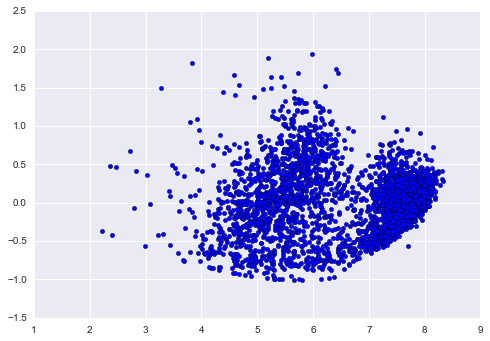

In [54]:
predicted_gross = linmodel.predict(X)
plt.scatter(predicted_gross, linmodel.resid)

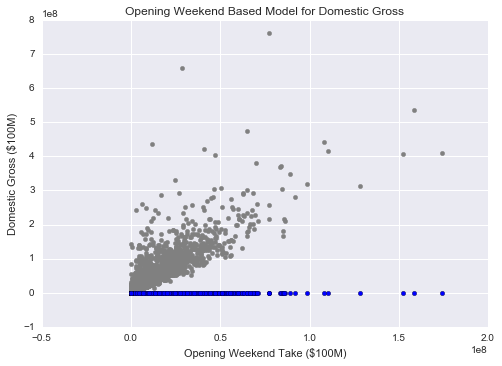

In [55]:
plt.scatter(df.opening_weekend_take, df.domestic_gross, color = 'grey')
plt.scatter(df.opening_weekend_take, predicted_gross)
plt.title("Opening Weekend Based Model for Domestic Gross")
plt.xlabel("Opening Weekend Take ($100M)")
plt.ylabel("Domestic Gross ($100M)")

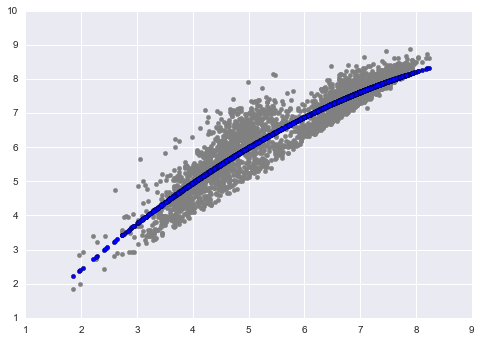

In [56]:

plt.scatter(X_df.log_opening_week_take, X_df.log_domestic_gross, color='grey')
plt.scatter(X_df.log_opening_week_take, predicted_gross)
# plt.scatter(X_df.log_opening_week_take_sq, predicted_gross, color='red')

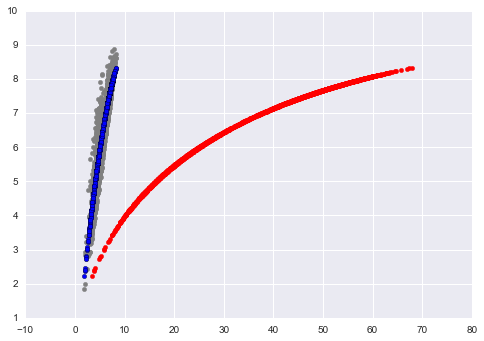

In [57]:

plt.scatter(X_df.log_opening_week_take, X_df.log_domestic_gross, color='grey')
plt.scatter(X_df.log_opening_week_take, predicted_gross)
plt.scatter(X_df.log_opening_week_take_sq, predicted_gross, color='red')

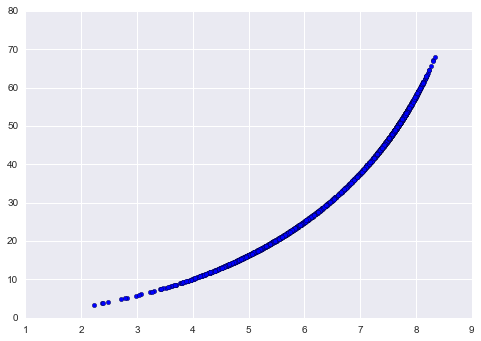

In [58]:
plt.scatter(predicted_gross, X_df.log_opening_week_take_sq)

#### Challenge 14

`statsmodels` also allows you to build models using formulas. That can
come in handy if the features and their functional forms start getting
a bit complicated. Build the same quadratic model from the previous
challenge, but do it with a formula. Use

    import statsmodels.formula.api as smf

Then define a formula that looks something like this:

    formula = 'target_column_name ~  feature_1 + feature_2'

where the `target_column_name`, `feature_1` and `feature_2` will be
replaced with column names in your dataframe, and then use the
`ols` function from the imported module which we called `smf` to use
the formula on your data. Make sure the model is exactly the same as
the one from the previous question.

In [59]:
import statsmodels.formula.api as smf

In [60]:
X_df = pd.DataFrame(np.matrix([df_log.log_domestic_gross, df_log.log_opening_week_take, (df_log.log_opening_week_take)**2]).T)
X_df.columns = ['log_domestic_gross','log_opening_week_take','log_opening_week_take_sq']
X_df = X_df.dropna(axis = 0)
X_df = sm.add_constant(X_df)
Y = X_df.log_domestic_gross
X = np.array([X_df.const, X_df.log_opening_week_take, X_df.log_opening_week_take_sq]).T
X

array([[  1.        ,   7.55470096,  57.07350662],
       [  1.        ,   7.29848958,  53.26795014],
       [  1.        ,   6.9206805 ,  47.89581865],
       ..., 
       [  1.        ,   7.30245252,  53.32581278],
       [  1.        ,   7.19103281,  51.7109529 ],
       [  1.        ,   6.65421583,  44.2785883 ]])

In [61]:
formula = 'log_domestic_gross ~ log_opening_week_take + log_opening_week_take_sq'

In [62]:
results = smf.ols(formula, X_df).fit()

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_domestic_gross   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Thu, 14 Jul 2016   Prob (F-statistic):               0.00
Time:                        18:03:43   Log-Likelihood:                -1884.3
No. Observations:                3548   AIC:                             3775.
Df Residuals:                    3545   BIC:                             3793.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.7040      0.143     -4.916      0.000        -0.985    -0.423
log_opening_week_take        1.7175      0.053     32.253      0.000         1.613     1.822
log_opening_week_take_sq    -0.0754      0.005    -15.977      0.000        -0.085    -0.066
==============================================================================
Omnibus:                      262.595   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.434
Skew:                           0.577   Prob(JB):                     1.67e-90
Kurtosis:                       4.210   Cond. No.                         899.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Challenge 15

Let's see how doing linear regression works in `scikit.learn`:

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    Y = df['domestic_gross']
    X = df[['opening_weekend_take']]
    model.fit(X, Y)

Pretty straightforward. One thing of note is the double bracket for
X. For Y, `sklearn` expects a single column, one array. However, for X,
it expects a matrix, with one column each for every feature we include
in our model. Here, we are only including one, but it still expects
not a single vector, but a matrix with only one column. When we put a
list of column names within the brackets for a pandas dataframe, it
gives us a new dataframe with all the columns. In the same spirit, we
are here giving it a list, so we can get a Dataframe (a matrix) and
not a Series (a vector) so as not to confuse `sklearn`. Also, note that
the `fit` method is called with X first, then Y. And we don't need to
do anything extra about the intercept.

Ok, `sklearn` does not provide a summary table. If you need to look at
the coefficients and the intercept:

    print model.coef_
    print model.intercept_

If you need to calculate the mean squared error of the model:

    from sklearn.metrics import mean_squared_error
    Y_pred = model.predict(X)
    Y_true = Y
    print mean_squared_error(Y_pred, Y_true

and so on... Scikit.learn has a lot of tools to inform you about the
model but you have to import and use them separately, one by one.

Now, to the challenge. Fit the quadratic log model again, but this
time with `scikit.learn`. Compare the results with what you got from `statsmodels`.

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
model = LinearRegression()
Y = df['domestic_gross']
X = df[['opening_weekend_take']]
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
model.coef_

array([ 3.47337085])

In [67]:
model.intercept_

5397173.5691372827

In [68]:
Y_pred = model.predict(X)

In [69]:
Y_true = Y

In [70]:
mean_squared_error(Y_pred, Y_true)

884362197698914.25